In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline

In [6]:
df = pd.read_csv('data_files/youtube_data.csv')
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [4]:
df.isnull().any()

Rank             False
Grade            False
Channel name     False
Video Uploads    False
Subscribers      False
Video views      False
dtype: bool

In [7]:
df[df['Video Uploads']=='--']

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
267,268th,,MidnightXChannel,--,--,190256974
517,518th,,Dusama Pets TV,--,--,91601494
2323,"2,324th",,Random,--,12275,17897584
3072,"3,073rd",,Boram Tube Toy Shcool [보람튜브…,--,726527,205555289
3247,"3,248th",,atheer sultan,--,--,79663674
4898,"4,899th",,ExzoticSlice,--,99785,9745292


In [9]:
t = df.replace('--', np.nan)
t.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [10]:
t['Grade'] = t['Grade'].astype('category')
t['Grade']=t['Grade'].cat.codes

In [11]:
t['Grade']

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
4970    4
4971    4
4972    4
4973    4
4974    4
4975    4
4976    4
4977    4
4978    4
4979    4
4980    4
4981    4
4982    4
4983    4
4984    4
4985    4
4986    4
4987    4
4988    4
4989    4
4990    4
4991    4
4992    4
4993    4
4994    4
4995    4
4996    4
4997    4
4998    4
4999    4
Name: Grade, Length: 5000, dtype: int8

In [12]:
t=t.drop(columns="Channel name")

In [13]:
for i in range(1,5001):
    t.iloc[i-1,0]=i

In [14]:
t.head()

,Rank,Grade,Video Uploads,Subscribers,Video views
0,1,2,82757,18752951,20869786591
1,2,2,12661,61196302,47548839843
2,3,2,373,19238251,9793305082
3,4,2,27323,31180559,22675948293
4,5,2,36756,32852346,26273668433


In [15]:
t.isnull().any()

Rank             False
Grade            False
Video Uploads     True
Subscribers      False
Video views      False
dtype: bool

In [16]:
t['Video Uploads']=t['Video Uploads'].fillna(0)

In [17]:
t['Video Uploads']=t['Video Uploads'].astype('uint64')

In [18]:
t['Subscribers'] = [x.replace('--','0') for x in t['Subscribers']]

In [19]:
t['Subscribers']=t['Subscribers'].astype('uint64')

In [20]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Rank             5000 non-null int64
Grade            5000 non-null int8
Video Uploads    5000 non-null uint64
Subscribers      5000 non-null uint64
Video views      5000 non-null int64
dtypes: int64(2), int8(1), uint64(2)
memory usage: 161.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1149e4828>,
      dtype=object)

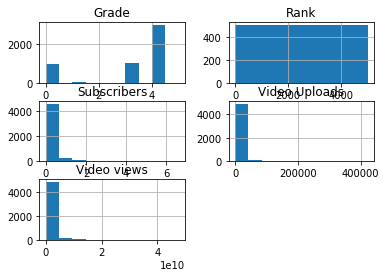

In [21]:
t.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1149878d0>,
      dtype=object)

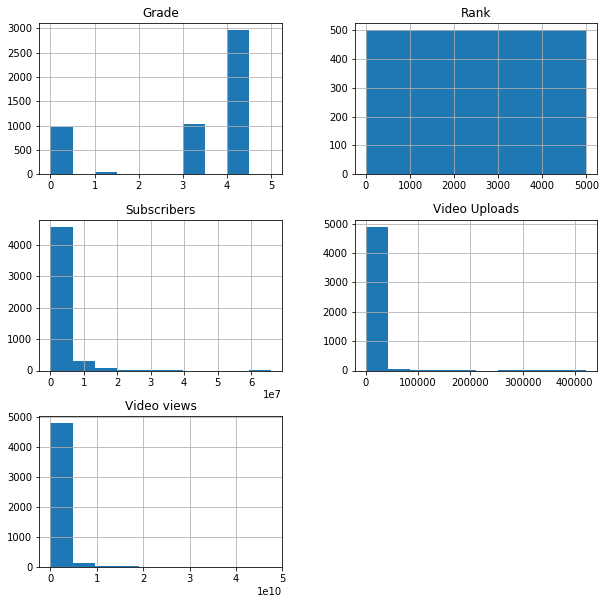

In [22]:
t.hist(figsize=(10,10))

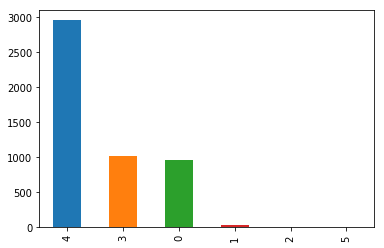

In [23]:
t['Grade'].value_counts().plot(kind='bar')

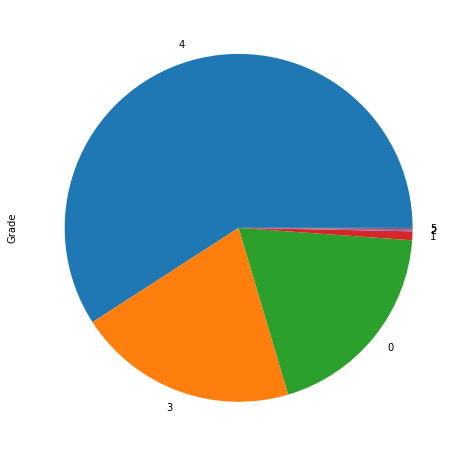

In [24]:
t['Grade'].value_counts().plot(kind='pie',figsize=(8,8))

**Findings**:
1.Subscribers and video views are positively correlated. If subscribers increase video views will also increase.
2.Subscribers and video uploads are slightly negatively correlated.
3.Channels with large number of subscribers and viewers have less videos uploaded